In [168]:
import pandas as pd
from matplotlib import pyplot as plt
from datetime import datetime

In [169]:
# Read CSV data

In [170]:
df_house_A_0 = pd.read_csv('HouseA_HW5.csv')
df_house_B_0 = pd.read_csv('HouseB_HW5.csv')
df_house_C_0 = pd.read_csv('HouseC_HW5.csv')
df_house_D_0 = pd.read_csv('HouseD_HW5.csv')

In [171]:
df_house_D_0.head()

,Date/Time,All
0,01/01 01:00:00,17.540900
1,01/01 02:00:00,17.092382
2,01/01 03:00:00,16.768862
3,01/01 04:00:00,16.972979
4,01/01 05:00:00,17.180736


## Data Preprocessing

In [172]:
# Split the Date/Time Column by removing spaces

In [173]:
df_house_A_1 = pd.concat([df_house_A_0['Date/Time'].str.split(' ', expand=True),df_house_A_0['Consumption (kW)']], axis=1)
df_house_B_1 = pd.concat([df_house_B_0['Date/Time'].str.split(' ', expand=True),df_house_B_0['all']], axis=1)
df_house_C_1 = pd.concat([df_house_C_0['Date/Time'].str.split(' ', expand=True),df_house_C_0['all']], axis=1)
df_house_D_1 = pd.concat([df_house_D_0['Date/Time'].str.split(' ', expand=True),df_house_D_0['All']], axis=1)

In [174]:
# Drop empty columns. Rename the numerical columns and column names with spaces

In [175]:
cols = [0,2]

# House A
df_house_A_1.drop(df_house_A_1.columns[cols],axis=1,inplace=True)
df_house_A_1.rename(columns={1: "Date", 3:"Time", "Consumption (kW)": "consumption_kw_A"},inplace=True)

# House B
df_house_B_1.drop(df_house_B_1.columns[cols],axis=1,inplace=True)
df_house_B_1.rename(columns={1: "Date", 3:"Time", "all": "consumption_kw_B"},inplace=True)

# House C
df_house_C_1.drop(df_house_C_1.columns[cols],axis=1,inplace=True)
df_house_C_1.rename(columns={1: "Date", 3:"Time", "all": "consumption_kw_C"},inplace=True)

# House D
df_house_D_1.drop(df_house_D_1.columns[cols],axis=1,inplace=True)
df_house_D_1.rename(columns={1: "Date", 3:"Time", "All": "consumption_kw_D"},inplace=True)

In [176]:
# Split columns with / and add the year

In [177]:
# House A
df_house_A_2 = pd.concat([df_house_A_1['Date'].str.split('/', expand=True),df_house_A_1['Time'],
                          df_house_A_1['consumption_kw_A']], axis=1)
df_house_A_2.rename(columns={0: "Month", 1:"Day"},inplace=True)
df_house_A_2["Year"] = 2021

# House B
df_house_B_2 = pd.concat([df_house_B_1['Date'].str.split('/', expand=True),df_house_B_1['Time'], 
                          df_house_B_1['consumption_kw_B']], axis=1)
df_house_B_2.rename(columns={0: "Month", 1:"Day"},inplace=True)
df_house_B_2["Year"] = 2021

# House C
df_house_C_2 = pd.concat([df_house_C_1['Date'].str.split('/', expand=True),df_house_C_1['Time'], 
                          df_house_C_1['consumption_kw_C']], axis=1)
df_house_C_2.rename(columns={0: "Month", 1:"Day"},inplace=True)
df_house_C_2["Year"] = 2021

# House D
df_house_D_2 = pd.concat([df_house_D_1['Date'].str.split('/', expand=True),df_house_D_1['Time'], 
                          df_house_D_1['consumption_kw_D']], axis=1)
df_house_D_2.rename(columns={0: "Month", 1:"Day"},inplace=True)
df_house_D_2["Year"] = 2021

In [178]:
# Create date_time column with the format "YYYYY-MM-DD HH:MM:ss" and date change 24:00:00 into 00:00:00

In [179]:
cols=["Year","Month","Day"]

# House A
df_house_A_2['date_1'] = df_house_A_2[cols].apply(lambda x: '-'.join(x.values.astype(str)), axis="columns")
df_house_A_2['date_1'] = pd.to_datetime(df_house_A_2['date_1'])
df_house_A_2['date_time'] = pd.to_datetime(df_house_A_2.date_1) + pd.to_timedelta(df_house_A_2.Time, unit='h')

# House B
df_house_B_2['date_1'] = df_house_B_2[cols].apply(lambda x: '-'.join(x.values.astype(str)), axis="columns")
df_house_B_2['date_1'] = pd.to_datetime(df_house_B_2['date_1'])
df_house_B_2['date_time'] = pd.to_datetime(df_house_B_2.date_1) + pd.to_timedelta(df_house_B_2.Time, unit='h')

# House C
df_house_C_2['date_1'] = df_house_C_2[cols].apply(lambda x: '-'.join(x.values.astype(str)), axis="columns")
df_house_C_2['date_1'] = pd.to_datetime(df_house_C_2['date_1'])
df_house_C_2['date_time'] = pd.to_datetime(df_house_C_2.date_1) + pd.to_timedelta(df_house_C_2.Time, unit='h')

# House D
df_house_D_2['date_1'] = df_house_D_2[cols].apply(lambda x: '-'.join(x.values.astype(str)), axis="columns")
df_house_D_2['date_1'] = pd.to_datetime(df_house_D_2['date_1'])
df_house_D_2['date_time'] = pd.to_datetime(df_house_D_2.date_1) + pd.to_timedelta(df_house_D_2.Time, unit='h')

In [180]:
# Get the final columns needed to model

In [181]:
df_house_A_clean = df_house_A_2[['date_time', 'consumption_kw_A']]
df_house_B_clean = df_house_B_2[['date_time', 'consumption_kw_B']]
df_house_C_clean = df_house_C_2[['date_time', 'consumption_kw_C']]
df_house_D_clean = df_house_D_2[['date_time', 'consumption_kw_D']]

In [182]:
df_house_all_clean = df_house_B_clean.merge(df_house_C_clean, on='date_time', how='left')\
                                    .merge(df_house_D_clean, on='date_time', how='left')\
                                    .merge(df_house_A_clean, on='date_time', how='left')

In [183]:
df_house_all_clean = df_house_all_clean [['date_time', 'consumption_kw_A', 'consumption_kw_B',\
                                          'consumption_kw_C', 'consumption_kw_D']]          

In [184]:
df_house_all_clean

,date_time,consumption_kw_A,consumption_kw_B,consumption_kw_C,consumption_kw_D
0,2021-01-01 01:00:00,NaN,40.793727,31.905699,17.540900
1,2021-01-01 02:00:00,NaN,41.837084,33.507795,17.092382
2,2021-01-01 03:00:00,NaN,41.642094,33.627417,16.768862
3,2021-01-01 04:00:00,NaN,42.812967,35.474427,16.972979
4,2021-01-01 05:00:00,NaN,44.793965,35.959651,17.180736
...,...,...,...,...,...
8011,2021-11-30 20:00:00,19.806196,26.424780,11.941523,11.588644
8012,2021-11-30 21:00:00,19.912400,26.270907,12.091889,12.336184
8013,2021-11-30 22:00:00,20.801582,25.880839,13.430376,13.060969
8014,2021-11-30 23:00:00,21.512624,25.476308,14.736651,13.687397


In [185]:
df_house_all_clean['consumption_kw_avg'] = df_house_all_clean.mean(axis=1)

In [186]:
df_house_all_clean

,date_time,consumption_kw_A,consumption_kw_B,consumption_kw_C,consumption_kw_D,consumption_kw_avg
0,2021-01-01 01:00:00,NaN,40.793727,31.905699,17.540900,30.080108
1,2021-01-01 02:00:00,NaN,41.837084,33.507795,17.092382,30.812420
2,2021-01-01 03:00:00,NaN,41.642094,33.627417,16.768862,30.679458
3,2021-01-01 04:00:00,NaN,42.812967,35.474427,16.972979,31.753458
4,2021-01-01 05:00:00,NaN,44.793965,35.959651,17.180736,32.644784
...,...,...,...,...,...,...
8011,2021-11-30 20:00:00,19.806196,26.424780,11.941523,11.588644,17.440286
8012,2021-11-30 21:00:00,19.912400,26.270907,12.091889,12.336184,17.652845
8013,2021-11-30 22:00:00,20.801582,25.880839,13.430376,13.060969,18.293441
8014,2021-11-30 23:00:00,21.512624,25.476308,14.736651,13.687397,18.853245


# Task 2

### Training and Testing Set Split

In [378]:
break_date = "2021-12-01 00"

In [379]:
df_house_ABCD_train = df_house_all_clean[df_house_all_clean["date_time"] <= break_date]
df_house_ABCD_test = df_house_A_clean[df_house_A_clean["date_time"] > break_date]

## T1.1 Deep Feed-Forward Neural Network

### Training Data Preparation

In [380]:
from numpy import array

In [381]:
# Split a univariate sequence into samples

In [382]:
def split_sequence(sequence, n_steps):
    X, y = list(), list()
    for i in range(len(sequence)):
        # find the end of this pattern
        end_ix = i + n_steps
        # check if we are beyond the sequence
        if end_ix > len(sequence)-1:
            break
        # gather input and output parts of the pattern
        seq_x, seq_y = sequence[i:end_ix], sequence[end_ix]
        X.append(seq_x)
        y.append(seq_y)
    return array(X), array(y)

In [383]:
# Define the input sequence

In [384]:
train = df_house_ABCD_train['consumption_kw_B']

In [385]:
train = train.dropna()

In [386]:
train = train.reset_index(drop=True)

In [387]:
# Choose a number of time steps

In [388]:
n_steps = 12

In [389]:
# Split into samples

In [390]:
X, y = split_sequence(train, n_steps)
print(len(X), len(y))

8004 8004


In [391]:
X.shape, y.shape

((8004, 12), (8004,))

In [392]:
# Summarize the data

In [393]:
for i in range(len(X)):
    print(X[i], y[i])

[40.79372665 41.83708365 41.64209434 42.81296726 44.79396506 48.78704019
 56.91952044 58.04818455 54.66628511 44.47564143 40.17471635 36.12698922] 33.86879621
[41.83708365 41.64209434 42.81296726 44.79396506 48.78704019 56.91952044
 58.04818455 54.66628511 44.47564143 40.17471635 36.12698922 33.86879621] 32.70708968
[41.64209434 42.81296726 44.79396506 48.78704019 56.91952044 58.04818455
 54.66628511 44.47564143 40.17471635 36.12698922 33.86879621 32.70708968] 30.88345421
[42.81296726 44.79396506 48.78704019 56.91952044 58.04818455 54.66628511
 44.47564143 40.17471635 36.12698922 33.86879621 32.70708968 30.88345421] 31.12540015
[44.79396506 48.78704019 56.91952044 58.04818455 54.66628511 44.47564143
 40.17471635 36.12698922 33.86879621 32.70708968 30.88345421 31.12540015] 34.83585099
[48.78704019 56.91952044 58.04818455 54.66628511 44.47564143 40.17471635
 36.12698922 33.86879621 32.70708968 30.88345421 31.12540015 34.83585099] 40.89654229999999
[56.91952044 58.04818455 54.66628511 44.

 48.29192724 49.74882883 47.97024766 45.90938324 46.12715768 46.37852961] 47.69858001
[39.39101597 43.70286264 47.0412658  46.32007743 48.35867011 48.29192724
 49.74882883 47.97024766 45.90938324 46.12715768 46.37852961 47.69858001] 49.45604475
[43.70286264 47.0412658  46.32007743 48.35867011 48.29192724 49.74882883
 47.97024766 45.90938324 46.12715768 46.37852961 47.69858001 49.45604475] 49.38882222
[47.0412658  46.32007743 48.35867011 48.29192724 49.74882883 47.97024766
 45.90938324 46.12715768 46.37852961 47.69858001 49.45604475 49.38882222] 54.26685402
[46.32007743 48.35867011 48.29192724 49.74882883 47.97024766 45.90938324
 46.12715768 46.37852961 47.69858001 49.45604475 49.38882222 54.26685402] 44.82780215
[48.35867011 48.29192724 49.74882883 47.97024766 45.90938324 46.12715768
 46.37852961 47.69858001 49.45604475 49.38882222 54.26685402 44.82780215] 38.05704877
[48.29192724 49.74882883 47.97024766 45.90938324 46.12715768 46.37852961
 47.69858001 49.45604475 49.38882222 54.266854

 44.75286595 46.05959553 48.89391116 50.78997073 52.9371771  57.83025074] 57.85876708
[36.37811528 37.66836091 38.02175948 40.46989251 43.45974223 44.75286595
 46.05959553 48.89391116 50.78997073 52.9371771  57.83025074 57.85876708] 55.49414631
[37.66836091 38.02175948 40.46989251 43.45974223 44.75286595 46.05959553
 48.89391116 50.78997073 52.9371771  57.83025074 57.85876708 55.49414631] 53.76167183
[38.02175948 40.46989251 43.45974223 44.75286595 46.05959553 48.89391116
 50.78997073 52.9371771  57.83025074 57.85876708 55.49414631 53.76167183] 52.09816282
[40.46989251 43.45974223 44.75286595 46.05959553 48.89391116 50.78997073
 52.9371771  57.83025074 57.85876708 55.49414631 53.76167183 52.09816282] 47.40057517
[43.45974223 44.75286595 46.05959553 48.89391116 50.78997073 52.9371771
 57.83025074 57.85876708 55.49414631 53.76167183 52.09816282 47.40057517] 44.67347345
[44.75286595 46.05959553 48.89391116 50.78997073 52.9371771  57.83025074
 57.85876708 55.49414631 53.76167183 52.0981628

 24.6635575  27.00405151 27.24953372 27.64213067 27.98794963 27.85988617] 27.66116882
[19.74730541 20.5587337  19.26062913 20.33101938 23.92728815 24.6635575
 27.00405151 27.24953372 27.64213067 27.98794963 27.85988617 27.66116882] 27.93302899
[20.5587337  19.26062913 20.33101938 23.92728815 24.6635575  27.00405151
 27.24953372 27.64213067 27.98794963 27.85988617 27.66116882 27.93302899] 28.34219963
[19.26062913 20.33101938 23.92728815 24.6635575  27.00405151 27.24953372
 27.64213067 27.98794963 27.85988617 27.66116882 27.93302899 28.34219963] 27.99854024
[20.33101938 23.92728815 24.6635575  27.00405151 27.24953372 27.64213067
 27.98794963 27.85988617 27.66116882 27.93302899 28.34219963 27.99854024] 28.11190178
[23.92728815 24.6635575  27.00405151 27.24953372 27.64213067 27.98794963
 27.85988617 27.66116882 27.93302899 28.34219963 27.99854024 28.11190178] 28.7996526
[24.6635575  27.00405151 27.24953372 27.64213067 27.98794963 27.85988617
 27.66116882 27.93302899 28.34219963 27.99854024

 33.62854299 31.14926429 31.45640983 35.49944931 32.18038478 30.30996317] 30.20151341
[50.29230932 48.93917302 45.54215295 37.99328347 33.00533266 33.62854299
 31.14926429 31.45640983 35.49944931 32.18038478 30.30996317 30.20151341] 32.25837138
[48.93917302 45.54215295 37.99328347 33.00533266 33.62854299 31.14926429
 31.45640983 35.49944931 32.18038478 30.30996317 30.20151341 32.25837138] 33.58581272
[45.54215295 37.99328347 33.00533266 33.62854299 31.14926429 31.45640983
 35.49944931 32.18038478 30.30996317 30.20151341 32.25837138 33.58581272] 31.39208221
[37.99328347 33.00533266 33.62854299 31.14926429 31.45640983 35.49944931
 32.18038478 30.30996317 30.20151341 32.25837138 33.58581272 31.39208221] 31.24932129
[33.00533266 33.62854299 31.14926429 31.45640983 35.49944931 32.18038478
 30.30996317 30.20151341 32.25837138 33.58581272 31.39208221 31.24932129] 33.36287792
[33.62854299 31.14926429 31.45640983 35.49944931 32.18038478 30.30996317
 30.20151341 32.25837138 33.58581272 31.392082

 37.33797181 36.71912718 33.47663793 34.48384615 32.99886626 35.48677371] 42.16927085
[66.9877953  63.65708113 53.43457392 44.52947539 41.49923609 37.33797181
 36.71912718 33.47663793 34.48384615 32.99886626 35.48677371 42.16927085] 51.00772141
[63.65708113 53.43457392 44.52947539 41.49923609 37.33797181 36.71912718
 33.47663793 34.48384615 32.99886626 35.48677371 42.16927085 51.00772141] 57.97403238
[53.43457392 44.52947539 41.49923609 37.33797181 36.71912718 33.47663793
 34.48384615 32.99886626 35.48677371 42.16927085 51.00772141 57.97403238] 58.15403701
[44.52947539 41.49923609 37.33797181 36.71912718 33.47663793 34.48384615
 32.99886626 35.48677371 42.16927085 51.00772141 57.97403238 58.15403701] 57.69086726
[41.49923609 37.33797181 36.71912718 33.47663793 34.48384615 32.99886626
 35.48677371 42.16927085 51.00772141 57.97403238 58.15403701 57.69086726] 55.04557501
[37.33797181 36.71912718 33.47663793 34.48384615 32.99886626 35.48677371
 42.16927085 51.00772141 57.97403238 58.154037

[17.66701538 19.94367508 15.54058974 11.44931627 12.11016674  7.70760584
  7.64942738  7.89517556  7.85042515  8.18572737  9.28292825 12.42624206] 12.51652982
[19.94367508 15.54058974 11.44931627 12.11016674  7.70760584  7.64942738
  7.89517556  7.85042515  8.18572737  9.28292825 12.42624206 12.51652982] 15.74902743
[15.54058974 11.44931627 12.11016674  7.70760584  7.64942738  7.89517556
  7.85042515  8.18572737  9.28292825 12.42624206 12.51652982 15.74902743] 15.27950721
[11.44931627 12.11016674  7.70760584  7.64942738  7.89517556  7.85042515
  8.18572737  9.28292825 12.42624206 12.51652982 15.74902743 15.27950721] 16.50956211
[12.11016674  7.70760584  7.64942738  7.89517556  7.85042515  8.18572737
  9.28292825 12.42624206 12.51652982 15.74902743 15.27950721 16.50956211] 16.89257733
[ 7.70760584  7.64942738  7.89517556  7.85042515  8.18572737  9.28292825
 12.42624206 12.51652982 15.74902743 15.27950721 16.50956211 16.89257733] 16.57545069
[ 7.64942738  7.89517556  7.85042515  8.185727

 26.59715444 29.54422942 30.2561882  30.99169286 31.84952958 32.01026766] 31.91489786
[30.08325185 28.34576281 26.76416395 26.30106752 26.29533442 26.59715444
 29.54422942 30.2561882  30.99169286 31.84952958 32.01026766 31.91489786] 31.87138701
[28.34576281 26.76416395 26.30106752 26.29533442 26.59715444 29.54422942
 30.2561882  30.99169286 31.84952958 32.01026766 31.91489786 31.87138701] 31.50448601
[26.76416395 26.30106752 26.29533442 26.59715444 29.54422942 30.2561882
 30.99169286 31.84952958 32.01026766 31.91489786 31.87138701 31.50448601] 31.55567892
[26.30106752 26.29533442 26.59715444 29.54422942 30.2561882  30.99169286
 31.84952958 32.01026766 31.91489786 31.87138701 31.50448601 31.55567892] 32.024076199999996
[26.29533442 26.59715444 29.54422942 30.2561882  30.99169286 31.84952958
 32.01026766 31.91489786 31.87138701 31.50448601 31.55567892 32.0240762 ] 32.67604936
[26.59715444 29.54422942 30.2561882  30.99169286 31.84952958 32.01026766
 31.91489786 31.87138701 31.50448601 31.

 44.38999625 37.2108568  34.97102009 32.10599678 31.02567048 29.54997718] 27.86082357
[43.10217431 43.95604341 47.60219714 46.86040055 43.64753657 44.38999625
 37.2108568  34.97102009 32.10599678 31.02567048 29.54997718 27.86082357] 26.47529754
[43.95604341 47.60219714 46.86040055 43.64753657 44.38999625 37.2108568
 34.97102009 32.10599678 31.02567048 29.54997718 27.86082357 26.47529754] 25.9972268
[47.60219714 46.86040055 43.64753657 44.38999625 37.2108568  34.97102009
 32.10599678 31.02567048 29.54997718 27.86082357 26.47529754 25.9972268 ] 25.57078281
[46.86040055 43.64753657 44.38999625 37.2108568  34.97102009 32.10599678
 31.02567048 29.54997718 27.86082357 26.47529754 25.9972268  25.57078281] 27.74776679
[43.64753657 44.38999625 37.2108568  34.97102009 32.10599678 31.02567048
 29.54997718 27.86082357 26.47529754 25.9972268  25.57078281 27.74776679] 30.52436744
[44.38999625 37.2108568  34.97102009 32.10599678 31.02567048 29.54997718
 27.86082357 26.47529754 25.9972268  25.57078281

[40.8672394  40.03589453 40.08110543 40.2679099  42.56223638 44.83143874
 44.07455774 46.05816261 46.19802993 43.1254984  38.97361973 37.26987253] 35.62601979
[40.03589453 40.08110543 40.2679099  42.56223638 44.83143874 44.07455774
 46.05816261 46.19802993 43.1254984  38.97361973 37.26987253 35.62601979] 32.19525858
[40.08110543 40.2679099  42.56223638 44.83143874 44.07455774 46.05816261
 46.19802993 43.1254984  38.97361973 37.26987253 35.62601979 32.19525858] 30.32215632
[40.2679099  42.56223638 44.83143874 44.07455774 46.05816261 46.19802993
 43.1254984  38.97361973 37.26987253 35.62601979 32.19525858 30.32215632] 28.58962058
[42.56223638 44.83143874 44.07455774 46.05816261 46.19802993 43.1254984
 38.97361973 37.26987253 35.62601979 32.19525858 30.32215632 28.58962058] 28.39944214
[44.83143874 44.07455774 46.05816261 46.19802993 43.1254984  38.97361973
 37.26987253 35.62601979 32.19525858 30.32215632 28.58962058 28.39944214] 27.55287998
[44.07455774 46.05816261 46.19802993 43.1254984

  4.47302596  4.05051135  4.48949479  7.16741211  7.78014711  9.09574558] 10.97068075
[17.7615142  16.69331452 11.32615077  7.95968583  5.82788908  4.47302596
  4.05051135  4.48949479  7.16741211  7.78014711  9.09574558 10.97068075] 11.14078206
[16.69331452 11.32615077  7.95968583  5.82788908  4.47302596  4.05051135
  4.48949479  7.16741211  7.78014711  9.09574558 10.97068075 11.14078206] 9.931574108
[11.32615077  7.95968583  5.82788908  4.47302596  4.05051135  4.48949479
  7.16741211  7.78014711  9.09574558 10.97068075 11.14078206  9.93157411] 9.428405065
[ 7.95968583  5.82788908  4.47302596  4.05051135  4.48949479  7.16741211
  7.78014711  9.09574558 10.97068075 11.14078206  9.93157411  9.42840506] 9.41668508
[ 5.82788908  4.47302596  4.05051135  4.48949479  7.16741211  7.78014711
  9.09574558 10.97068075 11.14078206  9.93157411  9.42840506  9.41668508] 9.764522276000001
[ 4.47302596  4.05051135  4.48949479  7.16741211  7.78014711  9.09574558
 10.97068075 11.14078206  9.93157411  9.4

[21.20629322 21.45075263 17.99924716 17.19795696 17.43547854 14.79158747
 13.32335705 10.54460572  9.39115569  8.6158653   8.78508718 11.41200887] 12.00519634
[21.45075263 17.99924716 17.19795696 17.43547854 14.79158747 13.32335705
 10.54460572  9.39115569  8.6158653   8.78508718 11.41200887 12.00519634] 13.09630963
[17.99924716 17.19795696 17.43547854 14.79158747 13.32335705 10.54460572
  9.39115569  8.6158653   8.78508718 11.41200887 12.00519634 13.09630963] 14.41036407
[17.19795696 17.43547854 14.79158747 13.32335705 10.54460572  9.39115569
  8.6158653   8.78508718 11.41200887 12.00519634 13.09630963 14.41036407] 14.94542723
[17.43547854 14.79158747 13.32335705 10.54460572  9.39115569  8.6158653
  8.78508718 11.41200887 12.00519634 13.09630963 14.41036407 14.94542723] 14.3645579
[14.79158747 13.32335705 10.54460572  9.39115569  8.6158653   8.78508718
 11.41200887 12.00519634 13.09630963 14.41036407 14.94542723 14.3645579 ] 13.72080763
[13.32335705 10.54460572  9.39115569  8.6158653 

  2.72739602  3.10081169  3.79959036  4.47056977  5.97127108  7.40651659] 8.019650431
[12.05027461  8.88335224  5.72128273  3.87347474  2.65056541  2.72739602
  3.10081169  3.79959036  4.47056977  5.97127108  7.40651659  8.01965043] 7.906463124
[8.88335224 5.72128273 3.87347474 2.65056541 2.72739602 3.10081169
 3.79959036 4.47056977 5.97127108 7.40651659 8.01965043 7.90646312] 8.282053076
[5.72128273 3.87347474 2.65056541 2.72739602 3.10081169 3.79959036
 4.47056977 5.97127108 7.40651659 8.01965043 7.90646312 8.28205308] 8.182376077
[3.87347474 2.65056541 2.72739602 3.10081169 3.79959036 4.47056977
 5.97127108 7.40651659 8.01965043 7.90646312 8.28205308 8.18237608] 8.496484801
[2.65056541 2.72739602 3.10081169 3.79959036 4.47056977 5.97127108
 7.40651659 8.01965043 7.90646312 8.28205308 8.18237608 8.4964848 ] 8.768424357
[2.72739602 3.10081169 3.79959036 4.47056977 5.97127108 7.40651659
 8.01965043 7.90646312 8.28205308 8.18237608 8.4964848  8.76842436] 9.158694095
[3.10081169 3.799590

 13.90922757 14.68808453 16.26591776 15.09248046 14.80823088 16.0047322 ] 17.80474341
[15.48839974 13.6259444  13.21602151 13.93690826 14.37226093 13.90922757
 14.68808453 16.26591776 15.09248046 14.80823088 16.0047322  17.80474341] 20.01202469
[13.6259444  13.21602151 13.93690826 14.37226093 13.90922757 14.68808453
 16.26591776 15.09248046 14.80823088 16.0047322  17.80474341 20.01202469] 19.69682058
[13.21602151 13.93690826 14.37226093 13.90922757 14.68808453 16.26591776
 15.09248046 14.80823088 16.0047322  17.80474341 20.01202469 19.69682058] 19.76038865
[13.93690826 14.37226093 13.90922757 14.68808453 16.26591776 15.09248046
 14.80823088 16.0047322  17.80474341 20.01202469 19.69682058 19.76038865] 16.60009748
[14.37226093 13.90922757 14.68808453 16.26591776 15.09248046 14.80823088
 16.0047322  17.80474341 20.01202469 19.69682058 19.76038865 16.60009748] 14.16806334
[13.90922757 14.68808453 16.26591776 15.09248046 14.80823088 16.0047322
 17.80474341 20.01202469 19.69682058 19.7603886

 18.87740157 18.82291269 18.68531008 18.60051339 18.90896333 19.22554953] 19.53843069
[14.23126689 16.41653006 15.72533849 16.81393465 18.51320001 18.87740157
 18.82291269 18.68531008 18.60051339 18.90896333 19.22554953 19.53843069] 19.94145364
[16.41653006 15.72533849 16.81393465 18.51320001 18.87740157 18.82291269
 18.68531008 18.60051339 18.90896333 19.22554953 19.53843069 19.94145364] 21.92062245
[15.72533849 16.81393465 18.51320001 18.87740157 18.82291269 18.68531008
 18.60051339 18.90896333 19.22554953 19.53843069 19.94145364 21.92062245] 21.90878811
[16.81393465 18.51320001 18.87740157 18.82291269 18.68531008 18.60051339
 18.90896333 19.22554953 19.53843069 19.94145364 21.92062245 21.90878811] 17.73826714
[18.51320001 18.87740157 18.82291269 18.68531008 18.60051339 18.90896333
 19.22554953 19.53843069 19.94145364 21.92062245 21.90878811 17.73826714] 15.6584929
[18.87740157 18.82291269 18.68531008 18.60051339 18.90896333 19.22554953
 19.53843069 19.94145364 21.92062245 21.9087881

[10.87538525 11.16897806 12.88305581 10.9606398  10.22959016 10.48893087
  7.83661407  7.62552315  7.74345701  8.01637017  7.46039839  7.57236144] 7.5925914389999996
[11.16897806 12.88305581 10.9606398  10.22959016 10.48893087  7.83661407
  7.62552315  7.74345701  8.01637017  7.46039839  7.57236144  7.59259144] 8.07783262
[12.88305581 10.9606398  10.22959016 10.48893087  7.83661407  7.62552315
  7.74345701  8.01637017  7.46039839  7.57236144  7.59259144  8.07783262] 8.619196756000001
[10.9606398  10.22959016 10.48893087  7.83661407  7.62552315  7.74345701
  8.01637017  7.46039839  7.57236144  7.59259144  8.07783262  8.61919676] 10.02006884
[10.22959016 10.48893087  7.83661407  7.62552315  7.74345701  8.01637017
  7.46039839  7.57236144  7.59259144  8.07783262  8.61919676 10.02006884] 10.67919534
[10.48893087  7.83661407  7.62552315  7.74345701  8.01637017  7.46039839
  7.57236144  7.59259144  8.07783262  8.61919676 10.02006884 10.67919534] 10.82300973
[ 7.83661407  7.62552315  7.743457

 6.05800179 5.07914989 4.15697484 4.09029292 4.36148285 5.01281163] 6.662026752
[8.19362042 7.721958   6.83115524 6.03073372 6.78628368 6.05800179
 5.07914989 4.15697484 4.09029292 4.36148285 5.01281163 6.66202675] 5.936816216
[7.721958   6.83115524 6.03073372 6.78628368 6.05800179 5.07914989
 4.15697484 4.09029292 4.36148285 5.01281163 6.66202675 5.93681622] 6.615145672000001
[6.83115524 6.03073372 6.78628368 6.05800179 5.07914989 4.15697484
 4.09029292 4.36148285 5.01281163 6.66202675 5.93681622 6.61514567] 7.95018837
[6.03073372 6.78628368 6.05800179 5.07914989 4.15697484 4.09029292
 4.36148285 5.01281163 6.66202675 5.93681622 6.61514567 7.95018837] 9.062168442
[6.78628368 6.05800179 5.07914989 4.15697484 4.09029292 4.36148285
 5.01281163 6.66202675 5.93681622 6.61514567 7.95018837 9.06216844] 11.07706711
[ 6.05800179  5.07914989  4.15697484  4.09029292  4.36148285  5.01281163
  6.66202675  5.93681622  6.61514567  7.95018837  9.06216844 11.07706711] 12.3135581
[ 5.07914989  4.156974

 8.47676475 8.15381052 8.49731173 7.37240101 5.74693808 4.41631426] 3.8455110660000003
[7.96716745 7.93223248 7.22476081 7.85527668 8.56867736 8.47676475
 8.15381052 8.49731173 7.37240101 5.74693808 4.41631426 3.84551107] 2.4997950380000002
[7.93223248 7.22476081 7.85527668 8.56867736 8.47676475 8.15381052
 8.49731173 7.37240101 5.74693808 4.41631426 3.84551107 2.49979504] 2.428081729
[7.22476081 7.85527668 8.56867736 8.47676475 8.15381052 8.49731173
 7.37240101 5.74693808 4.41631426 3.84551107 2.49979504 2.42808173] 2.807981253
[7.85527668 8.56867736 8.47676475 8.15381052 8.49731173 7.37240101
 5.74693808 4.41631426 3.84551107 2.49979504 2.42808173 2.80798125] 2.90710187
[8.56867736 8.47676475 8.15381052 8.49731173 7.37240101 5.74693808
 4.41631426 3.84551107 2.49979504 2.42808173 2.80798125 2.90710187] 3.2100234810000003
[8.47676475 8.15381052 8.49731173 7.37240101 5.74693808 4.41631426
 3.84551107 2.49979504 2.42808173 2.80798125 2.90710187 3.21002348] 4.245017006
[8.15381052 8.4973

[ 4.54241878  2.88692168  3.08361367  3.6151311   3.96625789  4.42076659
  7.39251379 10.37025475 12.14852262 13.8829643  15.07805055 16.9802781 ] 16.34211681
[ 2.88692168  3.08361367  3.6151311   3.96625789  4.42076659  7.39251379
 10.37025475 12.14852262 13.8829643  15.07805055 16.9802781  16.34211681] 19.30964157
[ 3.08361367  3.6151311   3.96625789  4.42076659  7.39251379 10.37025475
 12.14852262 13.8829643  15.07805055 16.9802781  16.34211681 19.30964157] 18.92666547
[ 3.6151311   3.96625789  4.42076659  7.39251379 10.37025475 12.14852262
 13.8829643  15.07805055 16.9802781  16.34211681 19.30964157 18.92666547] 17.89186477
[ 3.96625789  4.42076659  7.39251379 10.37025475 12.14852262 13.8829643
 15.07805055 16.9802781  16.34211681 19.30964157 18.92666547 17.89186477] 18.41265674
[ 4.42076659  7.39251379 10.37025475 12.14852262 13.8829643  15.07805055
 16.9802781  16.34211681 19.30964157 18.92666547 17.89186477 18.41265674] 14.3600238
[ 7.39251379 10.37025475 12.14852262 13.8829643 

[4.45099798 3.3484954  2.71548783 2.68087783 2.45398217 2.47214352
 3.59032794 4.43004866 3.96028147 4.65575227 5.12196    6.79449128] 7.107542735
[3.3484954  2.71548783 2.68087783 2.45398217 2.47214352 3.59032794
 4.43004866 3.96028147 4.65575227 5.12196    6.79449128 7.10754274] 6.813110107999999
[2.71548783 2.68087783 2.45398217 2.47214352 3.59032794 4.43004866
 3.96028147 4.65575227 5.12196    6.79449128 7.10754274 6.81311011] 6.392729168
[2.68087783 2.45398217 2.47214352 3.59032794 4.43004866 3.96028147
 4.65575227 5.12196    6.79449128 7.10754274 6.81311011 6.39272917] 6.533238611
[2.45398217 2.47214352 3.59032794 4.43004866 3.96028147 4.65575227
 5.12196    6.79449128 7.10754274 6.81311011 6.39272917 6.53323861] 7.007041455
[2.47214352 3.59032794 4.43004866 3.96028147 4.65575227 5.12196
 6.79449128 7.10754274 6.81311011 6.39272917 6.53323861 7.00704146] 7.137803258
[3.59032794 4.43004866 3.96028147 4.65575227 5.12196    6.79449128
 7.10754274 6.81311011 6.39272917 6.53323861 7.0

[14.10791864 13.31098001 10.37443631  7.81634018  5.40704032  4.51071808
  3.03636119  2.67046981  3.4778942   4.14642349  4.0924006   5.24843074] 5.545792625
[13.31098001 10.37443631  7.81634018  5.40704032  4.51071808  3.03636119
  2.67046981  3.4778942   4.14642349  4.0924006   5.24843074  5.54579262] 6.031988083
[10.37443631  7.81634018  5.40704032  4.51071808  3.03636119  2.67046981
  3.4778942   4.14642349  4.0924006   5.24843074  5.54579262  6.03198808] 5.7647030489999995
[7.81634018 5.40704032 4.51071808 3.03636119 2.67046981 3.4778942
 4.14642349 4.0924006  5.24843074 5.54579262 6.03198808 5.76470305] 5.696922166
[5.40704032 4.51071808 3.03636119 2.67046981 3.4778942  4.14642349
 4.0924006  5.24843074 5.54579262 6.03198808 5.76470305 5.69692217] 5.418720604
[4.51071808 3.03636119 2.67046981 3.4778942  4.14642349 4.0924006
 5.24843074 5.54579262 6.03198808 5.76470305 5.69692217 5.4187206 ] 4.267229888999999
[3.03636119 2.67046981 3.4778942  4.14642349 4.0924006  5.24843074
 5.5

 6.31705397 4.87211223 3.27804803 3.57349972 5.26178081 6.51550834] 8.352122155
[6.77728213 6.31099736 6.7191335  6.37921043 6.42152469 6.31705397
 4.87211223 3.27804803 3.57349972 5.26178081 6.51550834 8.35212215] 9.172599319
[6.31099736 6.7191335  6.37921043 6.42152469 6.31705397 4.87211223
 3.27804803 3.57349972 5.26178081 6.51550834 8.35212215 9.17259932] 9.689556045
[6.7191335  6.37921043 6.42152469 6.31705397 4.87211223 3.27804803
 3.57349972 5.26178081 6.51550834 8.35212215 9.17259932 9.68955604] 9.890616593999999
[6.37921043 6.42152469 6.31705397 4.87211223 3.27804803 3.57349972
 5.26178081 6.51550834 8.35212215 9.17259932 9.68955604 9.89061659] 7.023522872000001
[6.42152469 6.31705397 4.87211223 3.27804803 3.57349972 5.26178081
 6.51550834 8.35212215 9.17259932 9.68955604 9.89061659 7.02352287] 4.493437933
[6.31705397 4.87211223 3.27804803 3.57349972 5.26178081 6.51550834
 8.35212215 9.17259932 9.68955604 9.89061659 7.02352287 4.49343793] 3.106199993
[4.87211223 3.27804803 3.5

[6.54401683 6.84225537 7.19099119 5.82621706 4.24461116 2.70403462
 2.00604525 1.48491744 1.7167463  1.97609988 2.31758114 3.30344443] 3.850885248
[6.84225537 7.19099119 5.82621706 4.24461116 2.70403462 2.00604525
 1.48491744 1.7167463  1.97609988 2.31758114 3.30344443 3.85088525] 3.622358488
[7.19099119 5.82621706 4.24461116 2.70403462 2.00604525 1.48491744
 1.7167463  1.97609988 2.31758114 3.30344443 3.85088525 3.62235849] 3.206831783
[5.82621706 4.24461116 2.70403462 2.00604525 1.48491744 1.7167463
 1.97609988 2.31758114 3.30344443 3.85088525 3.62235849 3.20683178] 3.067052582
[4.24461116 2.70403462 2.00604525 1.48491744 1.7167463  1.97609988
 2.31758114 3.30344443 3.85088525 3.62235849 3.20683178 3.06705258] 3.2218388819999997
[2.70403462 2.00604525 1.48491744 1.7167463  1.97609988 2.31758114
 3.30344443 3.85088525 3.62235849 3.20683178 3.06705258 3.22183888] 3.4519409139999997
[2.00604525 1.48491744 1.7167463  1.97609988 2.31758114 3.30344443
 3.85088525 3.62235849 3.20683178 3.06

  9.40923998 10.02794854  9.90612143  9.16811962  8.36929054  8.10162095] 6.11748085
[ 4.87205432  6.05282346  6.65827993  7.25355619  8.43256129  9.40923998
 10.02794854  9.90612143  9.16811962  8.36929054  8.10162095  6.11748085] 4.045144719
[ 6.05282346  6.65827993  7.25355619  8.43256129  9.40923998 10.02794854
  9.90612143  9.16811962  8.36929054  8.10162095  6.11748085  4.04514472] 2.283445542
[ 6.65827993  7.25355619  8.43256129  9.40923998 10.02794854  9.90612143
  9.16811962  8.36929054  8.10162095  6.11748085  4.04514472  2.28344554] 2.17866446
[ 7.25355619  8.43256129  9.40923998 10.02794854  9.90612143  9.16811962
  8.36929054  8.10162095  6.11748085  4.04514472  2.28344554  2.17866446] 2.594264024
[ 8.43256129  9.40923998 10.02794854  9.90612143  9.16811962  8.36929054
  8.10162095  6.11748085  4.04514472  2.28344554  2.17866446  2.59426402] 3.073714836
[ 9.40923998 10.02794854  9.90612143  9.16811962  8.36929054  8.10162095
  6.11748085  4.04514472  2.28344554  2.17866446

  8.88744455  7.13768586  5.53863965  4.68137754  2.6972276   3.34204451] 4.0023470869999995
[ 8.50984754  8.89770288  9.55296717 10.01084437 11.42122757  8.88744455
  7.13768586  5.53863965  4.68137754  2.6972276   3.34204451  4.00234709] 4.742634778
[ 8.89770288  9.55296717 10.01084437 11.42122757  8.88744455  7.13768586
  5.53863965  4.68137754  2.6972276   3.34204451  4.00234709  4.74263478] 5.7473343020000005
[ 9.55296717 10.01084437 11.42122757  8.88744455  7.13768586  5.53863965
  4.68137754  2.6972276   3.34204451  4.00234709  4.74263478  5.7473343 ] 6.900309678999999
[10.01084437 11.42122757  8.88744455  7.13768586  5.53863965  4.68137754
  2.6972276   3.34204451  4.00234709  4.74263478  5.7473343   6.90030968] 7.518441867999999
[11.42122757  8.88744455  7.13768586  5.53863965  4.68137754  2.6972276
  3.34204451  4.00234709  4.74263478  5.7473343   6.90030968  7.51844187] 7.774675302
[8.88744455 7.13768586 5.53863965 4.68137754 2.6972276  3.34204451
 4.00234709 4.74263478 5.74

[11.29816533 10.01273648  8.98295726  7.88572073  6.02017534  3.80927132
  2.09273077  1.65904822  1.47970904  1.45380345  1.51227461  1.90494617] 2.821415936
[10.01273648  8.98295726  7.88572073  6.02017534  3.80927132  2.09273077
  1.65904822  1.47970904  1.45380345  1.51227461  1.90494617  2.82141594] 3.5797481089999996
[8.98295726 7.88572073 6.02017534 3.80927132 2.09273077 1.65904822
 1.47970904 1.45380345 1.51227461 1.90494617 2.82141594 3.57974811] 3.3690914519999997
[7.88572073 6.02017534 3.80927132 2.09273077 1.65904822 1.47970904
 1.45380345 1.51227461 1.90494617 2.82141594 3.57974811 3.36909145] 3.150913623
[6.02017534 3.80927132 2.09273077 1.65904822 1.47970904 1.45380345
 1.51227461 1.90494617 2.82141594 3.57974811 3.36909145 3.15091362] 4.61862426
[3.80927132 2.09273077 1.65904822 1.47970904 1.45380345 1.51227461
 1.90494617 2.82141594 3.57974811 3.36909145 3.15091362 4.61862426] 5.506468191000001
[2.09273077 1.65904822 1.47970904 1.45380345 1.51227461 1.90494617
 2.82141

 3.19569045 2.82026448 2.69469215 2.62329692 2.50670565 2.40998506] 2.3436156
[1.44421418 1.49378584 1.86108344 2.71848328 3.43619582 3.19569045
 2.82026448 2.69469215 2.62329692 2.50670565 2.40998506 2.3436156 ] 2.408889455
[1.49378584 1.86108344 2.71848328 3.43619582 3.19569045 2.82026448
 2.69469215 2.62329692 2.50670565 2.40998506 2.3436156  2.40888946] 2.728539685
[1.86108344 2.71848328 3.43619582 3.19569045 2.82026448 2.69469215
 2.62329692 2.50670565 2.40998506 2.3436156  2.40888946 2.72853968] 3.315402787
[2.71848328 3.43619582 3.19569045 2.82026448 2.69469215 2.62329692
 2.50670565 2.40998506 2.3436156  2.40888946 2.72853968 3.31540279] 3.96492475
[3.43619582 3.19569045 2.82026448 2.69469215 2.62329692 2.50670565
 2.40998506 2.3436156  2.40888946 2.72853968 3.31540279 3.96492475] 4.087665724
[3.19569045 2.82026448 2.69469215 2.62329692 2.50670565 2.40998506
 2.3436156  2.40888946 2.72853968 3.31540279 3.96492475 4.08766572] 4.740810913
[2.82026448 2.69469215 2.62329692 2.50670

 3.43448533 3.7288823  4.2325364  4.87636953 5.96633733 7.00928378] 7.80544197
[1.46695128 1.44358738 1.49282808 1.85991975 2.71727013 3.43448533
 3.7288823  4.2325364  4.87636953 5.96633733 7.00928378 7.80544197] 8.709418278
[1.44358738 1.49282808 1.85991975 2.71727013 3.43448533 3.7288823
 4.2325364  4.87636953 5.96633733 7.00928378 7.80544197 8.70941828] 9.361132221
[1.49282808 1.85991975 2.71727013 3.43448533 3.7288823  4.2325364
 4.87636953 5.96633733 7.00928378 7.80544197 8.70941828 9.36113222] 9.772556109
[1.85991975 2.71727013 3.43448533 3.7288823  4.2325364  4.87636953
 5.96633733 7.00928378 7.80544197 8.70941828 9.36113222 9.77255611] 10.35154525
[ 2.71727013  3.43448533  3.7288823   4.2325364   4.87636953  5.96633733
  7.00928378  7.80544197  8.70941828  9.36113222  9.77255611 10.35154525] 9.831320031
[ 3.43448533  3.7288823   4.2325364   4.87636953  5.96633733  7.00928378
  7.80544197  8.70941828  9.36113222  9.77255611 10.35154525  9.83132003] 9.203929107
[ 3.7288823   4.2

 2.72079452 3.43884337 3.1981635  2.82233111 2.69620396 2.62419971] 2.679375592
[1.64139536 1.46711612 1.44396256 1.49361005 1.86184698 2.72079452
 3.43884337 3.1981635  2.82233111 2.69620396 2.62419971 2.67937559] 3.677223315
[1.46711612 1.44396256 1.49361005 1.86184698 2.72079452 3.43884337
 3.1981635  2.82233111 2.69620396 2.62419971 2.67937559 3.67722331] 4.565574125
[1.44396256 1.49361005 1.86184698 2.72079452 3.43884337 3.1981635
 2.82233111 2.69620396 2.62419971 2.67937559 3.67722331 4.56557413] 5.70405496
[1.49361005 1.86184698 2.72079452 3.43884337 3.1981635  2.82233111
 2.69620396 2.62419971 2.67937559 3.67722331 4.56557413 5.70405496] 6.974044648
[1.86184698 2.72079452 3.43884337 3.1981635  2.82233111 2.69620396
 2.62419971 2.67937559 3.67722331 4.56557413 5.70405496 6.97404465] 7.579200161
[2.72079452 3.43884337 3.1981635  2.82233111 2.69620396 2.62419971
 2.67937559 3.67722331 4.56557413 5.70405496 6.97404465 7.57920016] 7.654486434
[3.43884337 3.1981635  2.82233111 2.6962

[3.91958398 4.82049338 5.62515199 6.58975299 6.97087369 7.51168348
 8.19817858 7.47218541 6.03598282 4.61078641 3.14085148 2.41269872] 1.8382148109999998
[4.82049338 5.62515199 6.58975299 6.97087369 7.51168348 8.19817858
 7.47218541 6.03598282 4.61078641 3.14085148 2.41269872 1.83821481] 1.771394179
[5.62515199 6.58975299 6.97087369 7.51168348 8.19817858 7.47218541
 6.03598282 4.61078641 3.14085148 2.41269872 1.83821481 1.77139418] 1.717200183
[6.58975299 6.97087369 7.51168348 8.19817858 7.47218541 6.03598282
 4.61078641 3.14085148 2.41269872 1.83821481 1.77139418 1.71720018] 1.869444324
[6.97087369 7.51168348 8.19817858 7.47218541 6.03598282 4.61078641
 3.14085148 2.41269872 1.83821481 1.77139418 1.71720018 1.86944432] 2.91168467
[7.51168348 8.19817858 7.47218541 6.03598282 4.61078641 3.14085148
 2.41269872 1.83821481 1.77139418 1.71720018 1.86944432 2.91168467] 3.664609188
[8.19817858 7.47218541 6.03598282 4.61078641 3.14085148 2.41269872
 1.83821481 1.77139418 1.71720018 1.86944432 

[3.66066249 4.05740563 3.9513806  4.54092423 5.17524404 6.23360921
 7.50966959 8.50299558 9.33591997 9.15929277 9.61544018 9.10975485] 8.801598585
[4.05740563 3.9513806  4.54092423 5.17524404 6.23360921 7.50966959
 8.50299558 9.33591997 9.15929277 9.61544018 9.10975485 8.80159859] 8.850923762999999
[3.9513806  4.54092423 5.17524404 6.23360921 7.50966959 8.50299558
 9.33591997 9.15929277 9.61544018 9.10975485 8.80159859 8.85092376] 7.693892821
[4.54092423 5.17524404 6.23360921 7.50966959 8.50299558 9.33591997
 9.15929277 9.61544018 9.10975485 8.80159859 8.85092376 7.69389282] 5.811255905
[5.17524404 6.23360921 7.50966959 8.50299558 9.33591997 9.15929277
 9.61544018 9.10975485 8.80159859 8.85092376 7.69389282 5.81125591] 4.219078573
[6.23360921 7.50966959 8.50299558 9.33591997 9.15929277 9.61544018
 9.10975485 8.80159859 8.85092376 7.69389282 5.81125591 4.21907857] 2.394831424
[7.50966959 8.50299558 9.33591997 9.15929277 9.61544018 9.10975485
 8.80159859 8.85092376 7.69389282 5.81125591 

 3.03377861 2.93670644 2.96304558 3.2922601  3.1537662  3.00737183] 3.706015378
[9.03376422 8.71018502 6.56032087 4.31292313 3.44251129 3.03377861
 2.93670644 2.96304558 3.2922601  3.1537662  3.00737183 3.70601538] 4.500559376
[8.71018502 6.56032087 4.31292313 3.44251129 3.03377861 2.93670644
 2.96304558 3.2922601  3.1537662  3.00737183 3.70601538 4.50055938] 6.198987247000001
[6.56032087 4.31292313 3.44251129 3.03377861 2.93670644 2.96304558
 3.2922601  3.1537662  3.00737183 3.70601538 4.50055938 6.19898725] 8.346808902000001
[4.31292313 3.44251129 3.03377861 2.93670644 2.96304558 3.2922601
 3.1537662  3.00737183 3.70601538 4.50055938 6.19898725 8.3468089 ] 8.471564808
[3.44251129 3.03377861 2.93670644 2.96304558 3.2922601  3.1537662
 3.00737183 3.70601538 4.50055938 6.19898725 8.3468089  8.47156481] 8.778645285
[3.03377861 2.93670644 2.96304558 3.2922601  3.1537662  3.00737183
 3.70601538 4.50055938 6.19898725 8.3468089  8.47156481 8.77864528] 8.748023727
[2.93670644 2.96304558 3.292

 2.85258207 4.71832314 4.89695461 6.66623408 9.02600674 9.43575831] 9.557665368
[7.06865219 5.43351239 3.57721776 2.19026812 2.61275884 2.85258207
 4.71832314 4.89695461 6.66623408 9.02600674 9.43575831 9.55766537] 9.670925226
[5.43351239 3.57721776 2.19026812 2.61275884 2.85258207 4.71832314
 4.89695461 6.66623408 9.02600674 9.43575831 9.55766537 9.67092523] 9.719871658999999
[3.57721776 2.19026812 2.61275884 2.85258207 4.71832314 4.89695461
 6.66623408 9.02600674 9.43575831 9.55766537 9.67092523 9.71987166] 10.45972101
[ 2.19026812  2.61275884  2.85258207  4.71832314  4.89695461  6.66623408
  9.02600674  9.43575831  9.55766537  9.67092523  9.71987166 10.45972101] 10.58607936
[ 2.61275884  2.85258207  4.71832314  4.89695461  6.66623408  9.02600674
  9.43575831  9.55766537  9.67092523  9.71987166 10.45972101 10.58607936] 10.49488792
[ 2.85258207  4.71832314  4.89695461  6.66623408  9.02600674  9.43575831
  9.55766537  9.67092523  9.71987166 10.45972101 10.58607936 10.49488792] 9.826050

 10.7839676  11.30244966 11.76081023 11.85136994 11.26648274 11.35787393] 11.007047
[ 8.78404635  8.17076507  8.45632983  8.87684494 10.56482285 10.7839676
 11.30244966 11.76081023 11.85136994 11.26648274 11.35787393 11.007047  ] 11.05239436
[ 8.17076507  8.45632983  8.87684494 10.56482285 10.7839676  11.30244966
 11.76081023 11.85136994 11.26648274 11.35787393 11.007047   11.05239436] 11.20651816
[ 8.45632983  8.87684494 10.56482285 10.7839676  11.30244966 11.76081023
 11.85136994 11.26648274 11.35787393 11.007047   11.05239436 11.20651816] 11.48624595
[ 8.87684494 10.56482285 10.7839676  11.30244966 11.76081023 11.85136994
 11.26648274 11.35787393 11.007047   11.05239436 11.20651816 11.48624595] 11.77254314
[10.56482285 10.7839676  11.30244966 11.76081023 11.85136994 11.26648274
 11.35787393 11.007047   11.05239436 11.20651816 11.48624595 11.77254314] 12.01761075
[10.7839676  11.30244966 11.76081023 11.85136994 11.26648274 11.35787393
 11.007047   11.05239436 11.20651816 11.48624595 

 11.17740592 11.85234469 12.12589464 12.74410705 13.38717116 12.84968328] 13.49930645
[ 9.33157471 10.62059699 10.89426193 10.8318201  11.39346767 11.17740592
 11.85234469 12.12589464 12.74410705 13.38717116 12.84968328 13.49930645] 16.22903429
[10.62059699 10.89426193 10.8318201  11.39346767 11.17740592 11.85234469
 12.12589464 12.74410705 13.38717116 12.84968328 13.49930645 16.22903429] 14.43045765
[10.89426193 10.8318201  11.39346767 11.17740592 11.85234469 12.12589464
 12.74410705 13.38717116 12.84968328 13.49930645 16.22903429 14.43045765] 13.73962647
[10.8318201  11.39346767 11.17740592 11.85234469 12.12589464 12.74410705
 13.38717116 12.84968328 13.49930645 16.22903429 14.43045765 13.73962647] 14.00688033
[11.39346767 11.17740592 11.85234469 12.12589464 12.74410705 13.38717116
 12.84968328 13.49930645 16.22903429 14.43045765 13.73962647 14.00688033] 14.46379577
[11.17740592 11.85234469 12.12589464 12.74410705 13.38717116 12.84968328
 13.49930645 16.22903429 14.43045765 13.739626

 19.36771556 19.94551191 20.21158521 20.62691312 23.64122717 22.42929858] 21.34602626
[19.82214132 19.29798477 19.12566117 18.71416104 19.22970356 19.36771556
 19.94551191 20.21158521 20.62691312 23.64122717 22.42929858 21.34602626] 20.35917828
[19.29798477 19.12566117 18.71416104 19.22970356 19.36771556 19.94551191
 20.21158521 20.62691312 23.64122717 22.42929858 21.34602626 20.35917828] 20.97846909
[19.12566117 18.71416104 19.22970356 19.36771556 19.94551191 20.21158521
 20.62691312 23.64122717 22.42929858 21.34602626 20.35917828 20.97846909] 17.95234697
[18.71416104 19.22970356 19.36771556 19.94551191 20.21158521 20.62691312
 23.64122717 22.42929858 21.34602626 20.35917828 20.97846909 17.95234697] 15.5352342
[19.22970356 19.36771556 19.94551191 20.21158521 20.62691312 23.64122717
 22.42929858 21.34602626 20.35917828 20.97846909 17.95234697 15.5352342 ] 15.07588416
[19.36771556 19.94551191 20.21158521 20.62691312 23.64122717 22.42929858
 21.34602626 20.35917828 20.97846909 17.9523469

[10.00921209  5.5379116   3.23581968  2.75577207  2.73469178  3.01641776
  6.30328915 13.41416742 18.13136965 18.63983966 21.77231152 23.03712824] 23.40242827
[ 5.5379116   3.23581968  2.75577207  2.73469178  3.01641776  6.30328915
 13.41416742 18.13136965 18.63983966 21.77231152 23.03712824 23.40242827] 24.68005907
[ 3.23581968  2.75577207  2.73469178  3.01641776  6.30328915 13.41416742
 18.13136965 18.63983966 21.77231152 23.03712824 23.40242827 24.68005907] 25.80110912
[ 2.75577207  2.73469178  3.01641776  6.30328915 13.41416742 18.13136965
 18.63983966 21.77231152 23.03712824 23.40242827 24.68005907 25.80110912] 26.53205399
[ 2.73469178  3.01641776  6.30328915 13.41416742 18.13136965 18.63983966
 21.77231152 23.03712824 23.40242827 24.68005907 25.80110912 26.53205399] 24.05193487
[ 3.01641776  6.30328915 13.41416742 18.13136965 18.63983966 21.77231152
 23.03712824 23.40242827 24.68005907 25.80110912 26.53205399 24.05193487] 26.39238475
[ 6.30328915 13.41416742 18.13136965 18.639839

 14.74707936 14.99774779 15.76601476 16.44616727 20.04493842 20.17394923] 22.16793338
[21.64103321 21.21972271 21.23034193 19.29163755 16.74738255 14.74707936
 14.99774779 15.76601476 16.44616727 20.04493842 20.17394923 22.16793338] 19.94637982
[21.21972271 21.23034193 19.29163755 16.74738255 14.74707936 14.99774779
 15.76601476 16.44616727 20.04493842 20.17394923 22.16793338 19.94637982] 17.83819942
[21.23034193 19.29163755 16.74738255 14.74707936 14.99774779 15.76601476
 16.44616727 20.04493842 20.17394923 22.16793338 19.94637982 17.83819942] 17.04465426
[19.29163755 16.74738255 14.74707936 14.99774779 15.76601476 16.44616727
 20.04493842 20.17394923 22.16793338 19.94637982 17.83819942 17.04465426] 16.33328619
[16.74738255 14.74707936 14.99774779 15.76601476 16.44616727 20.04493842
 20.17394923 22.16793338 19.94637982 17.83819942 17.04465426 16.33328619] 15.82008961
[14.74707936 14.99774779 15.76601476 16.44616727 20.04493842 20.17394923
 22.16793338 19.94637982 17.83819942 17.044654

 24.03055956 23.57944246 24.42507164 24.83029116 25.19468915 25.76820969] 29.20463149
[25.91752933 25.88567698 25.34650063 25.94201572 23.63857865 24.03055956
 23.57944246 24.42507164 24.83029116 25.19468915 25.76820969 29.20463149] 27.43015992
[25.88567698 25.34650063 25.94201572 23.63857865 24.03055956 23.57944246
 24.42507164 24.83029116 25.19468915 25.76820969 29.20463149 27.43015992] 26.94524453
[25.34650063 25.94201572 23.63857865 24.03055956 23.57944246 24.42507164
 24.83029116 25.19468915 25.76820969 29.20463149 27.43015992 26.94524453] 26.92724717
[25.94201572 23.63857865 24.03055956 23.57944246 24.42507164 24.83029116
 25.19468915 25.76820969 29.20463149 27.43015992 26.94524453 26.92724717] 23.44058614
[23.63857865 24.03055956 23.57944246 24.42507164 24.83029116 25.19468915
 25.76820969 29.20463149 27.43015992 26.94524453 26.92724717 23.44058614] 23.17461875
[24.03055956 23.57944246 24.42507164 24.83029116 25.19468915 25.76820969
 29.20463149 27.43015992 26.94524453 26.927247

 23.36075548 24.30557858 23.93630215 23.6880284  24.5578051  24.21765175] 24.09251398
[18.82017113 19.02221952 20.20599712 23.67028419 23.07202728 23.36075548
 24.30557858 23.93630215 23.6880284  24.5578051  24.21765175 24.09251398] 24.54220136
[19.02221952 20.20599712 23.67028419 23.07202728 23.36075548 24.30557858
 23.93630215 23.6880284  24.5578051  24.21765175 24.09251398 24.54220136] 24.67342488
[20.20599712 23.67028419 23.07202728 23.36075548 24.30557858 23.93630215
 23.6880284  24.5578051  24.21765175 24.09251398 24.54220136 24.67342488] 24.70254378
[23.67028419 23.07202728 23.36075548 24.30557858 23.93630215 23.6880284
 24.5578051  24.21765175 24.09251398 24.54220136 24.67342488 24.70254378] 24.94573678
[23.07202728 23.36075548 24.30557858 23.93630215 23.6880284  24.5578051
 24.21765175 24.09251398 24.54220136 24.67342488 24.70254378 24.94573678] 25.93325977
[23.36075548 24.30557858 23.93630215 23.6880284  24.5578051  24.21765175
 24.09251398 24.54220136 24.67342488 24.70254378

In [394]:
y.shape

(8004,)

### Model Training

In [395]:
from tensorflow import keras
from keras.models import Sequential
from keras import Input
from keras.layers import Dense, Flatten

In [396]:
model = Sequential()
model.add(Flatten(input_shape=(n_steps, 1), name='Input-Layer'))
model.add(Dense(2, activation='relu', name='Hidden-Layer')) #4, 6, 8, 10
model.add(Dense(1, name='Output-Layer'))
model.compile(optimizer='adam', loss='mse')

In [397]:
model.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Input-Layer (Flatten)        (None, 12)                0         
_________________________________________________________________
Hidden-Layer (Dense)         (None, 2)                 26        
_________________________________________________________________
Output-Layer (Dense)         (None, 1)                 3         
Total params: 29
Trainable params: 29
Non-trainable params: 0
_________________________________________________________________


In [398]:
model.fit(X, y, epochs=50, verbose=0)

### Test Data Set Treatment

In [399]:
# Choose a number of time steps

In [400]:
n_steps = 12

In [401]:
# Test Set with Lag created to get the X_test to predict in the model

In [402]:
test = df_house_ABCD_test['consumption_kw_A']

In [403]:
test_set_with_lag = train.iloc[-n_steps:].append(test, ignore_index = True)
test_set_with_lag = test_set_with_lag.reset_index()
test_set_with_lag.drop(test_set_with_lag.columns[0],axis=1,inplace=True)
test_set_with_lag = test_set_with_lag.squeeze()

In [404]:
# Split into samples

In [405]:
X_test, y_test = split_sequence(test_set_with_lag, n_steps)

In [406]:
print(len(X_test), len(y_test))

744 744


In [407]:
# Reshape from [samples, timesteps] into [samples, timesteps, features]

In [408]:
n_features = 1
X_test = X_test.reshape((len(X_test), n_steps, n_features))

In [409]:
X_test.shape

(744, 12, 1)

### Actual Test Set to compare with the predicted values

In [410]:
test = df_house_ABCD_test['consumption_kw_A']
test = test.reset_index()
test.drop(test.columns[0],axis=1,inplace=True)
test = test.squeeze()

In [411]:
test.shape

(744,)

### Model Prediction

In [412]:
preds = model.predict(X_test)

In [413]:
# Put predictions in Pandas Dataframe

In [414]:
# test = test.iloc[n_steps:]

In [415]:
preds = pd.DataFrame(preds)

In [416]:
preds.shape

(744, 1)

In [417]:
preds

,0
0,24.665216
1,22.677958
2,25.749895
3,27.714418
4,29.388052
...,...
739,24.036472
740,24.554165
741,23.691969
742,22.242506


In [418]:
test

0      23.675968
1      25.239773
2      26.844480
3      28.815815
4      30.333043
         ...    
739    23.850543
740    23.654771
741    22.806547
742    21.532958
743    20.632155
Name: consumption_kw_A, Length: 744, dtype: float64

### MAPE and MAE

In [419]:
import numpy as np

In [420]:
def smape(a, f):
    return 1/len(a) * np.sum(2 * np.abs(f-a) / (np.abs(a) + np.abs(f))*100)

In [421]:
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error, mean_absolute_error

In [422]:
def report_metrics(true,predictions):
    print (f" n_steps: {n_steps}\
              MAPE: {mean_absolute_percentage_error(true,predictions)}\
              MAE: {mean_absolute_error(true,predictions)}")

In [423]:
report_metrics  (test, preds)

 n_steps: 12              MAPE: 0.04523592031082001              MAE: 1.1922020657206762


In [62]:
data = []

In [63]:
FFNN_Results = pd.DataFrame(data,
                     columns=['n_steps', 'MAPE', 'MAE'])

In [64]:
for i in range (2,48):
    X, y = split_sequence(train, i)
#    print(len(X), len(y))

# Model building
    model = Sequential()
    model.add(Flatten(input_shape=(i, 1))) 
    model.add(Dense(1))
    model.compile(optimizer='adam', loss='mse')
    model.fit(X, y, epochs=50, verbose=0)
    
# Testing data treatment for the model to get the X_test
    test = df_house_ABCD_test['consumption_kw_A']
    test_set_with_lag = train.iloc[-i:].append(test, ignore_index = True)
    test_set_with_lag = test_set_with_lag.reset_index()
    test_set_with_lag.drop(test_set_with_lag.columns[0],axis=1,inplace=True)
    test_set_with_lag = test_set_with_lag.squeeze()

# Actual Test Set to compare with the predicted values
    test = df_house_ABCD_test['consumption_kw_A']
    test = test.reset_index()
    test.drop(test.columns[0],axis=1,inplace=True)
    test = test.squeeze()
    
# Model Testing
    X_test, y_test = split_sequence(test_set_with_lag, i)
    n_features = 1
    X_test = X_test.reshape((len(X_test), i, n_features))
    preds = model.predict(X_test)
    preds = pd.DataFrame(preds)

# Get FFNN results
    FFNN_Results = FFNN_Results.append({'n_steps': i,
                         'MAPE': mean_absolute_percentage_error(test,preds),
                         'MAE': mean_absolute_error(test,preds)}, ignore_index=True)

In [65]:
import numpy as np
import matplotlib.pyplot as plt

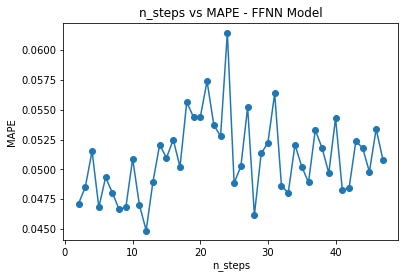

In [66]:
plt.plot(FFNN_Results['n_steps'], FFNN_Results['MAPE'], 'o-')
plt.xlabel('n_steps')
plt.ylabel('MAPE')
plt.title("n_steps vs MAPE - FFNN Model")
plt.show()

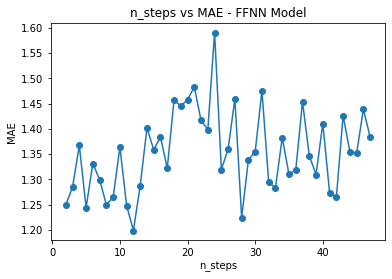

In [67]:
plt.plot(FFNN_Results['n_steps'], FFNN_Results['MAE'], 'o-')
plt.xlabel('n_steps')
plt.ylabel('MAE')
plt.title("n_steps vs MAE - FFNN Model")
plt.show()

In [68]:
FFNN_Results

,n_steps,MAPE,MAE
0,2.0,0.047122,1.249211
1,3.0,0.048521,1.285207
2,4.0,0.051530,1.367379
3,5.0,0.046808,1.243993
4,6.0,0.049326,1.331644
5,7.0,0.048041,1.299543
6,8.0,0.046637,1.250068
7,9.0,0.046836,1.264390
8,10.0,0.050882,1.364497
9,11.0,0.047007,1.247727


## T1.2 LSTM Model

### Training Data Preparation

In [69]:
from numpy import array

In [70]:
# Define the input sequence

In [71]:
train = df_house_ABCD_train['consumption_kw_avg']

In [72]:
# Choose a number of time steps

In [73]:
n_steps = 12

In [74]:
# Split into samples

In [75]:
X, y = split_sequence(train, n_steps)

In [76]:
# Reshape from [samples, timesteps] into [samples, timesteps, features]

In [77]:
n_features = 1
X = X.reshape((X.shape[0], X.shape[1], n_features))

### Model Training

In [78]:
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense

In [79]:
model = Sequential()
model.add(LSTM(100, activation='relu', input_shape=(n_steps, n_features))) # 25, 50, 75, 100, 150, 200
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

In [80]:
model.summary()

Model: "sequential_47"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 100)               40800     
_________________________________________________________________
dense_46 (Dense)             (None, 1)                 101       
Total params: 40,901
Trainable params: 40,901
Non-trainable params: 0
_________________________________________________________________


In [81]:
model.fit(X, y, epochs=50, verbose=0)

### Test data set treatment

In [82]:
# Choose a number of time steps

In [83]:
n_steps = 12

In [84]:
# Test Set with Lag created to get the X_test to predict in the model

In [85]:
test = df_house_ABCD_test['consumption_kw_A']

In [86]:
test_set_with_lag = train.iloc[-n_steps:].append(test, ignore_index = True)
test_set_with_lag = test_set_with_lag.reset_index()
test_set_with_lag.drop(test_set_with_lag.columns[0],axis=1,inplace=True)
test_set_with_lag = test_set_with_lag.squeeze()

In [87]:
test_set_with_lag.shape

(756,)

In [88]:
# Split into samples

In [89]:
X_test, y_test = split_sequence(test_set_with_lag, n_steps)

In [90]:
print(len(X_test), len(y_test))

744 744


In [91]:
# Reshape from [samples, timesteps] into [samples, timesteps, features]

In [92]:
n_features = 1
X_test = X_test.reshape((len(X_test), n_steps, n_features))

In [93]:
X_test.shape

(744, 12, 1)

### Actual Test Set to compare with the predicted values

In [94]:
test = df_house_ABCD_test['consumption_kw_A']
test = test.reset_index()
test.drop(test.columns[0],axis=1,inplace=True)
test = test.squeeze()

In [95]:
test.shape

(744,)

### Model Prediction

In [96]:
preds = model.predict(X_test)

In [97]:
# Put predictions in Pandas Dataframe

In [98]:
preds = pd.DataFrame(preds)

In [99]:
preds.shape

(744, 1)

### MAPE and MAE

In [100]:
report_metrics  (test, preds)

 n_steps: 12              MAPE: 0.049443607598662606              MAE: 1.3573278209454642


In [101]:
data = []

In [102]:
LSTM_Results = pd.DataFrame(data,
                     columns=['n_steps', 'MAPE', 'MAE'])

In [103]:
for i in range (2,12):
    train = df_house_ABCD_train['consumption_kw_avg']
    X, y = split_sequence(train, i)
    n_features = 1
    X = X.reshape((X.shape[0], X.shape[1], n_features))
    
# Model building
    model = Sequential()
    model.add(LSTM(100, activation='relu', input_shape=(i, n_features))) # 25, 50, 75, 100, 150, 200
    model.add(Dense(1))
    model.compile(optimizer='adam', loss='mse')
    model.fit(X, y, epochs=50, verbose=0)
    
# Testing data treatment for the model to get the X_test
    test = df_house_ABCD_test['consumption_kw_A']
    test_set_with_lag = train.iloc[-i:].append(test, ignore_index = True)
    test_set_with_lag = test_set_with_lag.reset_index()
    test_set_with_lag.drop(test_set_with_lag.columns[0],axis=1,inplace=True)
    test_set_with_lag = test_set_with_lag.squeeze()
    
# Actual Test Set to compare with the predicted values
    test = df_house_ABCD_test['consumption_kw_A']
    test = test.reset_index()
    test.drop(test.columns[0],axis=1,inplace=True)
    test = test.squeeze()
    
# Model Testing
    X_test, y_test = split_sequence(test_set_with_lag, i)
    n_features = 1
    X_test = X_test.reshape((len(X_test), i, n_features))
    preds = model.predict(X_test)
    preds = pd.DataFrame(preds)

# Get FFNN results
    LSTM_Results = LSTM_Results.append({'n_steps': i,
                         'MAPE': mean_absolute_percentage_error(test,preds),
                         'MAE': mean_absolute_error(test,preds)}, ignore_index=True)

In [104]:
LSTM_Results

,n_steps,MAPE,MAE
0,2.0,0.047080,1.224465
1,3.0,0.046270,1.215699
2,4.0,0.048327,1.283806
3,5.0,0.048270,1.287957
4,6.0,0.043198,1.145945
5,7.0,0.044010,1.176886
6,8.0,0.047035,1.255819
7,9.0,0.046232,1.239969
8,10.0,0.042923,1.137273
9,11.0,0.045503,1.220784


In [105]:
import numpy as np
import matplotlib.pyplot as plt

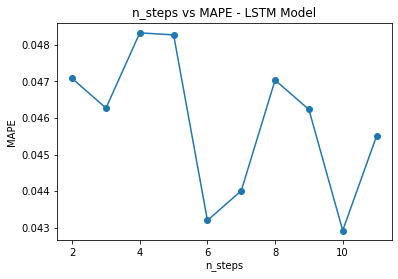

In [106]:
plt.plot(LSTM_Results['n_steps'], LSTM_Results['MAPE'], 'o-')
plt.xlabel('n_steps')
plt.ylabel('MAPE')
plt.title("n_steps vs MAPE - LSTM Model")
plt.show()

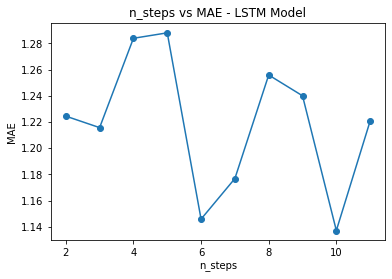

In [107]:
plt.plot(LSTM_Results['n_steps'], LSTM_Results['MAE'], 'o-')
plt.xlabel('n_steps')
plt.ylabel('MAE')
plt.title("n_steps vs MAE - LSTM Model")
plt.show()

## T1.3 Linear Regression

### Training Data Preparation

In [108]:
# Define the input sequence

In [109]:
train = df_house_ABCD_train[['date_time', 'consumption_kw_avg']]
train.rename(columns={'consumption_kw_avg': 'consumption_kw'}, inplace=True)

C:\Users\Admin\anaconda3\lib\site-packages\pandas\core\frame.py:4125: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


In [110]:
test = df_house_ABCD_test[['date_time','consumption_kw_A']]
test.rename(columns={'consumption_kw_A': 'consumption_kw'}, inplace=True)

In [111]:
df = train.append(test, ignore_index = True)

In [112]:
p=12
l = list(range(1, p+1))
l.reverse()
for i in l:
    df[f'lag_{i}'] = df['consumption_kw'].shift(i)

In [113]:
# df.head(20)

In [114]:
h=15
for i in range(0, h):
    df[f'out_{i}'] = df['consumption_kw'].shift(-i)

In [115]:
# df.tail(20)

In [116]:
df.set_index('date_time',inplace=True)

In [117]:
df = df.drop('consumption_kw',axis=1)

In [118]:
train = df.head(len(df)-15)
test = df.tail(15).head(1)

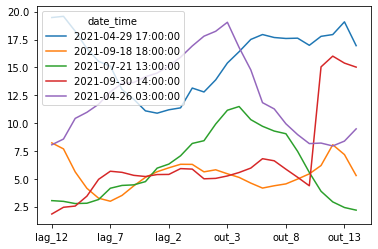

In [119]:
train.sample(5).T.plot()

In [120]:
print (train.shape)
train.dropna(axis=0, inplace=True)
print (train.shape)

(8745, 27)
(8733, 27)


<ipython-input-120-efbcb93d7c03>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train.dropna(axis=0, inplace=True)


In [121]:
trainX = train[[x for x in list(train) if 'lag' in x]]
trainY = train[[x for x in list(train) if 'out' in x]]
testX = test[[x for x in list(train) if 'lag' in x]]
testY = test[[x for x in list(train) if 'out' in x]]

### Model Training

In [122]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(trainX, trainY)

LinearRegression()

### Model Prediction

In [123]:
preds = lr.predict(testX)

In [124]:
preds = pd.DataFrame(preds)

In [125]:
list(testY.values[0])

[26.80092152,
 27.82179427,
 25.78125634,
 24.15149047,
 21.97820935,
 21.78428406,
 21.13327707,
 22.3904476,
 24.88890844,
 23.88064282,
 23.85054343,
 23.65477072,
 22.80654738,
 21.53295768,
 20.63215499]

In [126]:
list(preds.values[0])

[27.791874692990703,
 27.49730335303748,
 27.215042102853406,
 26.361746592629682,
 25.957879572445723,
 26.007140420737542,
 25.681218909076115,
 25.83810180574158,
 26.520018612372432,
 26.965627341774592,
 26.853471853909486,
 27.360288215628525,
 27.392712755745972,
 26.638761591741265,
 26.22654039081646]

### MAPE and MAE

In [127]:
import numpy as np

In [128]:
def smape(a, f):
    return 1/len(a) * np.sum(2 * np.abs(f-a) / (np.abs(a) + np.abs(f))*100)

In [129]:
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error, mean_absolute_error

In [130]:
def report_metrics(true,predictions):
    print (f" p: {p}\
              h: {h}\
              MAPE: {mean_absolute_percentage_error(true,predictions)}\
              MAE: {mean_absolute_error(true,predictions)}")

In [131]:
report_metrics  (testY, preds)

 p: 12              h: 15              MAPE: 0.14176673856461128              MAE: 3.1912335936950673


## T1.4 Naive Approach

In [132]:
train = df_house_ABCD_train[['date_time', 'consumption_kw_avg']]
train.rename(columns={'consumption_kw_avg': 'consumption_kw'}, inplace=True)

C:\Users\Admin\anaconda3\lib\site-packages\pandas\core\frame.py:4125: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


In [133]:
train.index

Int64Index([   0,    1,    2,    3,    4,    5,    6,    7,    8,    9,
            ...
            8006, 8007, 8008, 8009, 8010, 8011, 8012, 8013, 8014, 8015],
           dtype='int64', length=8016)

In [134]:
dd= np.asarray(train.consumption_kw)

In [135]:
test = df_house_ABCD_test[['date_time','consumption_kw_A']]
test.rename(columns={'consumption_kw_A': 'consumption_kw'}, inplace=True)

In [136]:
test.index+= 7968

In [137]:
y_hat = test.copy()

In [138]:
y_hat['naive'] = dd[len(dd)-1]

In [139]:
y_hat

,date_time,consumption_kw,naive
8016,2021-12-01 01:00:00,23.675968,19.677479
8017,2021-12-01 02:00:00,25.239773,19.677479
8018,2021-12-01 03:00:00,26.844480,19.677479
8019,2021-12-01 04:00:00,28.815815,19.677479
8020,2021-12-01 05:00:00,30.333043,19.677479
...,...,...,...
8755,2021-12-31 20:00:00,23.850543,19.677479
8756,2021-12-31 21:00:00,23.654771,19.677479
8757,2021-12-31 22:00:00,22.806547,19.677479
8758,2021-12-31 23:00:00,21.532958,19.677479


In [140]:
import matplotlib.pyplot as plt 

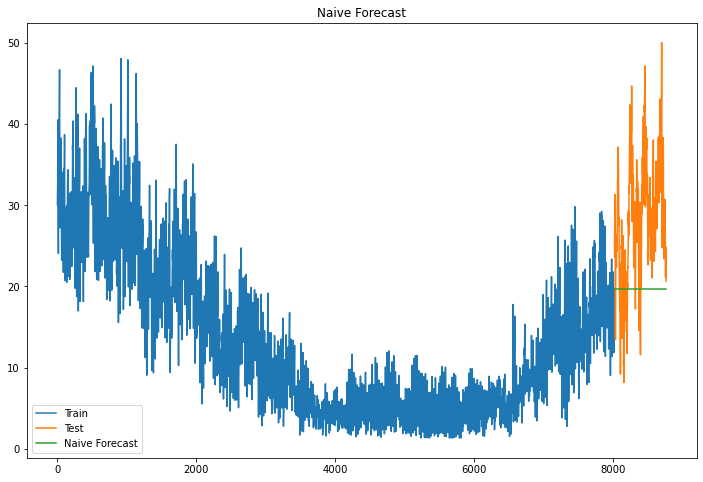

In [141]:
plt.figure(figsize=(12,8))
plt.plot(train.index, train.consumption_kw, label='Train')
plt.plot(test.index,test.consumption_kw, label='Test')
plt.plot(y_hat.index,y_hat['naive'], label='Naive Forecast')
plt.legend(loc='best')
plt.title("Naive Forecast")
plt.show()

### MAPE and MAE

In [142]:
import numpy as np

In [143]:
def smape(a, f):
    return 1/len(a) * np.sum(2 * np.abs(f-a) / (np.abs(a) + np.abs(f))*100)

In [144]:
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error, mean_absolute_error

In [145]:
def report_metrics(true,predictions):
    print (f" MAPE: {mean_absolute_percentage_error(true,predictions)}\
              MAE: {mean_absolute_error(true,predictions)}")

In [146]:
report_metrics  (test.consumption_kw, y_hat.naive)

 MAPE: 0.3210952758582183              MAE: 9.831712717041663


## T1.5 ARIMA Model

In [147]:
train = df_house_ABCD_train['consumption_kw_avg']

In [148]:
test = df_house_ABCD_test['consumption_kw_A']

In [149]:
from statsmodels.tsa.arima.model import ARIMA
model = ARIMA(train,order = (3,1,2))

In [150]:
model_fitted = model.fit()

C:\Users\Admin\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:965: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\Admin\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:977: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\Admin\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [151]:
preds = model_fitted.forecast(len(test))

In [152]:
result = preds.reset_index(drop = True)

### MAPE and MAE

In [153]:
import numpy as np

In [154]:
def smape(a, f):
    return 1/len(a) * np.sum(2 * np.abs(f-a) / (np.abs(a) + np.abs(f))*100)

In [155]:
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error, mean_absolute_error

In [156]:
def report_metrics(true,predictions):
    print (f" MAPE: {mean_absolute_percentage_error(true,predictions)}\
              MAE: {mean_absolute_error(true,predictions)}")

In [157]:
report_metrics  (test, result)

 MAPE: 0.3107104678085006              MAE: 9.47767815722162
